In [1]:
ROOT_DATA_DIR = 'bagmerge/InterventionDetectionFiles/FirstFrameDepthRGB/'
TRAIN_DIR = ROOT_DATA_DIR + 'train/'
TEST_DIR = ROOT_DATA_DIR + 'test/'
VAL_DIR = ROOT_DATA_DIR + 'val/'
TEST_SIZE = 0
K_FOLDS = 5
BATCH_SIZE = 32
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
CLASS_WEIGHT = None
INITIAL_BIAS = None

In [2]:
import numpy as np
import pandas as pd
import cv2
import datetime
import time
import sys
import os
import csv
import libdst
import tensorflow as tf
from tensorflow.keras import backend as K
from glob import glob
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
import shutil
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Rescaling, Concatenate, Conv2D, Softmax, ReLU, Input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# if len(physical_devices) > 0:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)
#     print("GPU memory growth enabled")

In [4]:
noone_p1 = glob(ROOT_DATA_DIR + 'p1/noone/*.png')
nurse_p1 = glob(ROOT_DATA_DIR + 'p1/nurse/*.png')
noone_p2 = glob(ROOT_DATA_DIR + 'p2/noone/*.png')
nurse_p2 = glob(ROOT_DATA_DIR + 'p2/nurse/*.png')
noone_p5 = glob(ROOT_DATA_DIR + 'p5/noone/*.png')
nurse_p5 = glob(ROOT_DATA_DIR + 'p5/nurse/*.png')
noone_p6 = glob(ROOT_DATA_DIR + 'p6/noone/*.png')
nurse_p6 = glob(ROOT_DATA_DIR + 'p6/nurse/*.png')
noone_p8 = glob(ROOT_DATA_DIR + 'p8/noone/*.png')
nurse_p8 = glob(ROOT_DATA_DIR + 'p8/nurse/*.png')
noone_p9 = glob(ROOT_DATA_DIR + 'p9/noone/*.png')
nurse_p9 = glob(ROOT_DATA_DIR + 'p9/nurse/*.png')
noone_p10 = glob(ROOT_DATA_DIR + 'p10/noone/*.png')
nurse_p10 = glob(ROOT_DATA_DIR + 'p10/nurse/*.png')
noone_p11 = glob(ROOT_DATA_DIR + 'p11/noone/*.png')
nurse_p11 = glob(ROOT_DATA_DIR + 'p11/nurse/*.png')
noone_p13 = glob(ROOT_DATA_DIR + 'p13/noone/*.png')
nurse_p13 = glob(ROOT_DATA_DIR + 'p13/nurse/*.png')
noone_p14 = glob(ROOT_DATA_DIR + 'p14/noone/*.png')
nurse_p14 = glob(ROOT_DATA_DIR + 'p14/nurse/*.png')
noone_p15 = glob(ROOT_DATA_DIR + 'p15/noone/*.png')
nurse_p15 = glob(ROOT_DATA_DIR + 'p15/nurse/*.png')
noone_p16 = glob(ROOT_DATA_DIR + 'p16/noone/*.png')
nurse_p16 = glob(ROOT_DATA_DIR + 'p16/nurse/*.png')
noone_p17 = glob(ROOT_DATA_DIR + 'p17/noone/*.png')
nurse_p17 = glob(ROOT_DATA_DIR + 'p17/nurse/*.png')
# noone_p18 = glob(ROOT_DATA_DIR + 'p18/noone/*.png')
# nurse_p18 = glob(ROOT_DATA_DIR + 'p18/nurse/*.png')
# noone_p19 = glob(ROOT_DATA_DIR + 'p19/noone/*.png')
# nurse_p19 = glob(ROOT_DATA_DIR + 'p19/nurse/*.png')
noone_p21 = glob(ROOT_DATA_DIR + 'p21/noone/*.png')
nurse_p21 = glob(ROOT_DATA_DIR + 'p21/nurse/*.png')
noone_p22 = glob(ROOT_DATA_DIR + 'p22/noone/*.png')
nurse_p22 = glob(ROOT_DATA_DIR + 'p22/nurse/*.png')
noone_p23 = glob(ROOT_DATA_DIR + 'p23/noone/*.png')
nurse_p23 = glob(ROOT_DATA_DIR + 'p23/nurse/*.png')
noone_p24 = glob(ROOT_DATA_DIR + 'p24/noone/*.png')
nurse_p24 = glob(ROOT_DATA_DIR + 'p24/nurse/*.png')
noone_p25 = glob(ROOT_DATA_DIR + 'p25/noone/*.png')
nurse_p25 = glob(ROOT_DATA_DIR + 'p25/nurse/*.png')
noone_p26 = glob(ROOT_DATA_DIR + 'p26/noone/*.png')
nurse_p26 = glob(ROOT_DATA_DIR + 'p26/nurse/*.png')
noone_p27 = glob(ROOT_DATA_DIR + 'p27/noone/*.png')
nurse_p27 = glob(ROOT_DATA_DIR + 'p27/nurse/*.png')
noone_p28 = glob(ROOT_DATA_DIR + 'p28/noone/*.png')
nurse_p28 = glob(ROOT_DATA_DIR + 'p28/nurse/*.png')
noone_p29 = glob(ROOT_DATA_DIR + 'p29/noone/*.png')
nurse_p29 = glob(ROOT_DATA_DIR + 'p29/nurse/*.png')
noone_p30 = glob(ROOT_DATA_DIR + 'p30/noone/*.png')
nurse_p30 = glob(ROOT_DATA_DIR + 'p30/nurse/*.png')
noone_p31 = glob(ROOT_DATA_DIR + 'p31/noone/*.png')
nurse_p31 = glob(ROOT_DATA_DIR + 'p31/nurse/*.png')
noone_p32 = glob(ROOT_DATA_DIR + 'p32/noone/*.png')
nurse_p32 = glob(ROOT_DATA_DIR + 'p32/nurse/*.png')
noone_p33 = glob(ROOT_DATA_DIR + 'p33/noone/*.png')
nurse_p33 = glob(ROOT_DATA_DIR + 'p33/nurse/*.png')
noone_p34 = glob(ROOT_DATA_DIR + 'p34/noone/*.png')
nurse_p34 = glob(ROOT_DATA_DIR + 'p34/nurse/*.png')
# noone_p35 = glob(ROOT_DATA_DIR + 'p35/noone/*.png')
# nurse_p35 = glob(ROOT_DATA_DIR + 'p35/nurse/*.png')
# noone_p36 = glob(ROOT_DATA_DIR + 'p36/noone/*.png')
# nurse_p36 = glob(ROOT_DATA_DIR + 'p36/nurse/*.png')
# noone_p37 = glob(ROOT_DATA_DIR + 'p37/noone/*.png')
# nurse_p37 = glob(ROOT_DATA_DIR + 'p37/nurse/*.png')
# noone_p38 = glob(ROOT_DATA_DIR + 'p38/noone/*.png')
# nurse_p38 = glob(ROOT_DATA_DIR + 'p38/nurse/*.png')

# all_noone = noone_p1 + noone_p2 + noone_p5 + noone_p6 + noone_p8 + noone_p9 + noone_p10 + noone_p11 + noone_p13 + noone_p14 + noone_p15 + noone_p16 + noone_p17 + noone_p18 + noone_p19 + noone_p21 + noone_p22 + noone_p23 + noone_p24 + noone_p25 + noone_p26 + noone_p27 + noone_p28 + noone_p29 + noone_p30 + noone_p31 + noone_p32 + noone_p33 + noone_p34 + noone_p35 + noone_p36 + noone_p37 + noone_p38
# all_nurse = nurse_p1 + nurse_p2 + nurse_p5 + nurse_p6 + nurse_p8 + nurse_p9 + nurse_p10 + nurse_p11 + nurse_p13 + nurse_p14 + nurse_p15 + nurse_p16 + nurse_p17 + nurse_p18 + nurse_p19 + nurse_p21 + nurse_p22 + nurse_p23 + nurse_p24 + nurse_p25 + nurse_p26 + nurse_p27 + nurse_p28 + nurse_p29 + nurse_p30 + nurse_p31 + nurse_p32 + nurse_p33 + nurse_p34 + nurse_p35 + nurse_p36 + nurse_p37 + nurse_p38

# all_noone_list = [noone_p1, noone_p2, noone_p6, noone_p8, noone_p9, noone_p10, noone_p11, noone_p13, noone_p14, noone_p15, noone_p16, noone_p18, noone_p19, noone_p21, noone_p22, noone_p24, noone_p26, noone_p27, noone_p28, noone_p29, noone_p30, noone_p31, noone_p32, noone_p33, noone_p34, noone_p35, noone_p36, noone_p37, noone_p38]
# all_nurse_list = [nurse_p1, nurse_p2, nurse_p6, nurse_p8, nurse_p9, nurse_p10, nurse_p11, nurse_p13, nurse_p14, nurse_p15, nurse_p16, nurse_p18, nurse_p19, nurse_p21, nurse_p22, nurse_p24, nurse_p26, nurse_p27, nurse_p28, nurse_p29, nurse_p30, nurse_p31, nurse_p32, nurse_p33, nurse_p34, nurse_p35, nurse_p36, nurse_p37, nurse_p38]

# all_noone_list = [noone_p1, noone_p2, noone_p5, noone_p6, noone_p8, noone_p9, noone_p10, noone_p11, noone_p13, noone_p14, noone_p15, noone_p16, noone_p17, noone_p18, noone_p19, noone_p21, noone_p22, noone_p23, noone_p24, noone_p25, noone_p26, noone_p27, noone_p28, noone_p29, noone_p30, noone_p31, noone_p32, noone_p33, noone_p34, noone_p35, noone_p36, noone_p37, noone_p38]
# all_nurse_list = [nurse_p1, nurse_p2, nurse_p5, nurse_p6, nurse_p8, nurse_p9, nurse_p10, nurse_p11, nurse_p13, nurse_p14, nurse_p15, nurse_p16, nurse_p17, nurse_p18, nurse_p19, nurse_p21, nurse_p22, nurse_p23, nurse_p24, nurse_p25, nurse_p26, nurse_p27, nurse_p28, nurse_p29, nurse_p30, nurse_p31, nurse_p32, nurse_p33, nurse_p34, nurse_p35, nurse_p36, nurse_p37, nurse_p38]

all_noone_list = [noone_p1, noone_p2, noone_p5, noone_p6, noone_p8, noone_p9, noone_p10, noone_p11, noone_p13, noone_p14, noone_p15, noone_p16, noone_p17, noone_p21, noone_p22, noone_p23, noone_p24, noone_p25, noone_p26, noone_p27, noone_p28, noone_p29, noone_p30, noone_p31, noone_p32, noone_p33, noone_p34]
all_nurse_list = [nurse_p1, nurse_p2, nurse_p5, nurse_p6, nurse_p8, nurse_p9, nurse_p10, nurse_p11, nurse_p13, nurse_p14, nurse_p15, nurse_p16, nurse_p17, nurse_p21, nurse_p22, nurse_p23, nurse_p24, nurse_p25, nurse_p26, nurse_p27, nurse_p28, nurse_p29, nurse_p30, nurse_p31, nurse_p32, nurse_p33, nurse_p34]


In [5]:
# all_noone_train = []
# all_noone_test = []
# for p in all_noone_list:
#     if len(p) > 0:
#         train, test = train_test_split(p, test_size=TEST_SIZE)
#         all_noone_train += [train]
#         all_noone_test += test

# all_nurse_train = []
# all_nurse_test = []
# for p in all_nurse_list:
#     if len(p) > 0:
#         train, test = train_test_split(p, test_size=TEST_SIZE)
#         all_nurse_train += [train]
#         all_nurse_test += test

In [6]:
all_noone_train = []
all_noone_test = []
all_nurse_train = []
all_nurse_test = []

if TEST_SIZE > 0:
    train, test = train_test_split(range(len(all_noone_list)), test_size=TEST_SIZE)
    
    for i in train:
        all_noone_train += [all_noone_list[i]]
        all_nurse_train += [all_nurse_list[i]]

    for i in test:
        all_noone_test += all_noone_list[i]
        all_nurse_test += all_nurse_list[i]
elif TEST_SIZE == 0:
    all_noone_train = all_noone_list
    all_nurse_train = all_nurse_list

In [7]:
remFiles = glob(TEST_DIR + 'noone/'+ '*.png')
for f in remFiles:
    os.remove(f)

remFiles = glob(TEST_DIR + 'nurse/'+ '*.png')
for f in remFiles:
    os.remove(f)

In [8]:
for f in all_noone_test:
    basename = os.path.basename(f)
    dst_path = TEST_DIR + 'noone/' + basename
    shutil.copy(f, dst_path)

for f in all_nurse_test:
    basename = os.path.basename(f)
    dst_path = TEST_DIR + 'nurse/' + basename
    shutil.copy(f, dst_path)

In [9]:
noone_test = glob(TEST_DIR + 'noone/*.png')
nurse_test = glob(TEST_DIR + 'nurse/*.png')
all_test = (noone_test, nurse_test)
labels = ['noone', 'nurse']

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1/65535,
    rotation_range=360,
    horizontal_flip=True,
    vertical_flip=True,
)
val_datagen = ImageDataGenerator(
    rescale=1/65535,
    rotation_range=360,
    horizontal_flip=True,
    vertical_flip=True,
)
test_datagen = ImageDataGenerator(
    rescale=1/65535,
    rotation_range=360,
    horizontal_flip=True,
    vertical_flip=True,
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    seed=123,
)

Found 0 images belonging to 2 classes.


In [11]:
# x_batch, y_batch = next(test_generator)

# plt.figure(figsize=(12, 12))
# plt.style.use('dark_background')
# for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
#     plt.subplot(4, 8, k+1)
#     plt.imshow((img + 1) / 2)
#     plt.title("Class: {}".format(labels[int(lbl)]))
#     plt.axis('off')

In [12]:
# test_model = VGG16(weights='imagenet', include_top=True)
# test_model.summary()

In [13]:
# test_model.layers[0:-1]

In [14]:
# trans_layers = test_model.layers[2:-1]
# trans_layers

In [15]:
# test_model.layers
# w = test_model.layers[1].get_weights()[0][:, :, 2, :]
# w = w.reshape(3, 3, 1, 64)
# b = test_model.layers[1].get_weights()[1]
# first_conv2d = Conv2D(64, kernel_size=3, padding='same', kernel_initializer=tf.keras.initializers.zeros(), use_bias=True, activation='relu')

# model = tf.keras.Sequential(
#     [
#         tf.keras.Input(shape=(224, 224, 1),name='input'),
#         first_conv2d,
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(10, activation="relu",use_bias=True,bias_initializer='zeros',name='dense1'),
#         tf.keras.layers.Dense(1, activation="softmax",name='output'),
#     ]
# )
# model.layers[0].get_weights()[0].shape

# model.layers[0].set_weights([w, b])
# model.layers[0].get_weights()

In [16]:
# test_model.layers[2:-1]

In [17]:
# test_model.summary()

# Custom Metrics

# Model Building

In [18]:
METRICS = [
        # tf.keras.metrics.TruePositives(name='tp'),
        # tf.keras.metrics.FalsePositives(name='fp'),
        # tf.keras.metrics.TrueNegatives(name='tn'),
        # tf.keras.metrics.FalseNegatives(name='fn'),
        # tf.keras.metrics.BinaryAccuracy(name='binary_accuracy'),
        tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='AUC'),
        tf.keras.metrics.AUC(name='prc', curve='PR'),
    ]

def create_model(finetuning=True, metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    
    base_model = VGG16(weights='imagenet', include_top=True)

    first_conv2d_bias = base_model.layers[1].get_weights()[-1]
    first_conv2d_weights = base_model.layers[1].get_weights()[0][:, :, 2, :].reshape(3, 3, 1, 64)
    
    custom_input = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 1), name="1-Channel_input")
    first_conv2d = Conv2D(64, kernel_size=3, padding='same', name="First_Conv2D")
    transfer_layers = base_model.layers[2:-1]
    predictions = Dense(2, activation="softmax", name="prediction_layer", bias_initializer=output_bias)

    model = Sequential()

    model.add(custom_input)
    model.add(first_conv2d)
    model.add(ReLU())

    model.layers[0].set_weights([first_conv2d_weights, first_conv2d_bias])

    for layer in transfer_layers:
        # print(layer)
        model.add(layer)

    model.add(predictions)

    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        # Use this for 
        optimizer=tf.optimizers.SGD(0.00001, momentum=0.9),
        # optimizer=tf.optimizers.SGD(),
        metrics=[METRICS],
        )
    return model


In [19]:
def prepFiles(noone_train, nurse_train, noone_val, nurse_val):
    # Clean up train and val folders
    remFiles = glob(TRAIN_DIR + 'noone/'+ '*.png')
    for f in remFiles:
        os.remove(f)
    remFiles = glob(TRAIN_DIR + 'nurse/'+ '*.png')
    for f in remFiles:
        os.remove(f)
    remFiles = glob(VAL_DIR + 'noone/'+ '*.png')
    for f in remFiles:
        os.remove(f)
    remFiles = glob(VAL_DIR + 'nurse/'+ '*.png')
    for f in remFiles:
        os.remove(f)

    # Move files of current fold into their folders
    for f in noone_train:
        basename = os.path.basename(f)
        dst_path = TRAIN_DIR + 'noone/' + basename
        shutil.copy(f, dst_path)
    for f in nurse_train:
        basename = os.path.basename(f)
        dst_path = TRAIN_DIR + 'nurse/' + basename
        shutil.copy(f, dst_path)
    for f in noone_val:
        basename = os.path.basename(f)
        dst_path = VAL_DIR + 'noone/' + basename
        shutil.copy(f, dst_path)
    for f in nurse_val:
        basename = os.path.basename(f)
        dst_path = VAL_DIR + 'nurse/' + basename
        shutil.copy(f, dst_path)

    noone_train = glob(TRAIN_DIR + 'noone/*.png')
    nurse_train = glob(TRAIN_DIR + 'nurse/*.png')

    noone_val = glob(VAL_DIR + 'noone/*.png')
    nurse_val = glob(VAL_DIR + 'nurse/*.png')

    return noone_train, nurse_train, noone_val, nurse_val

# Train with 5-fold CV

In [20]:
kf = KFold(n_splits=K_FOLDS)
cv_split = kf.split(range(len(all_noone_train)))
foldNum = 0

foldHistories = []
# foldMetrics = []

with tf.device('/CPU:0'):
    for train_index, val_index in cv_split:
        print("Fold {}: \n".format(foldNum))

        # Select the current folds for training and validation
        noone_train = []
        nurse_train = []
        noone_val = []
        nurse_val = []
        for i in train_index:
            noone_train += all_noone_train[i]
            nurse_train += all_nurse_train[i]
        for i in val_index:
            noone_val += all_noone_train[i]
            nurse_val += all_nurse_train[i]

        # Move images to training and testing folders
        noone_train, nurse_train, noone_val, nurse_val = prepFiles(noone_train, nurse_train, noone_val, nurse_val)
        all_train = [noone_train, nurse_train]
        all_val = [noone_val, nurse_val]

        print("noone_train: {}, nurse_train: {}".format(len(noone_train), len(nurse_train)))
        print("noone_val: {}, nurse_val: {}\n".format(len(noone_val), len(nurse_val)))

        weight_for_0 = (1 / (len(noone_train) + len(noone_val))) * ((len(nurse_train) + len(nurse_val) + len(noone_train) + len(noone_val)) / 2.0)
        weight_for_1 = (1 / (len(nurse_train) + len(nurse_val))) * ((len(nurse_train) + len(nurse_val) + len(noone_train) + len(noone_val)) / 2.0)
        CLASS_WEIGHT = {0: weight_for_0, 1: weight_for_1}
        print("Class Weights: {}\n".format(CLASS_WEIGHT))
        
        INITIAL_BIAS = np.log([(len(nurse_train) + len(nurse_val)) / (len(noone_train) + len(noone_val))])
        print("Initial Bias: {}\n".format(INITIAL_BIAS))

        train_generator = train_datagen.flow_from_directory(
            TRAIN_DIR,
            target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
            color_mode='grayscale',
            class_mode='categorical',
            batch_size=BATCH_SIZE,
            seed=123,
        )
        val_generator = val_datagen.flow_from_directory(
            VAL_DIR,
            target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
            color_mode='grayscale',
            class_mode='categorical',
            batch_size=BATCH_SIZE,
            seed=123,
        )

        # model = create_model(output_bias=INITIAL_BIAS)
        model = create_model()
        model.summary()
        checkpoint_path = "SavedModels/cp_fold_{}_lab.ckpt".format(foldNum)
        checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_prc', verbose=1, save_best_only=True, save_weights_only=True, mode='auto')
        earlyStopping = EarlyStopping(monitor='prc', min_delta=0, patience=8, verbose=1, mode='auto')

        history = model.fit(
            x=train_generator,
            epochs=20,
            # validation_data=val_generator,
            # validation_steps=1,
            # callbacks=[checkpoint],
            # callbacks=[checkpoint, earlyStopping],
            # class_weight=CLASS_WEIGHT,
        )

        model.save_weights(checkpoint_path)

        foldHistories.append(history)

        # metrics = model.evaluate(test_generator, return_dict=True)
        # for name, value in metrics.items():
        #     print(f"{name}: {value:.4f}")

        # foldMetrics.append(metrics)

        foldNum += 1

Fold 0: 

noone_train: 10734, nurse_train: 1001
noone_val: 2910, nurse_val: 259

Class Weights: {0: 0.5461741424802111, 1: 5.914285714285715}

Initial Bias: [-2.38218814]

Found 11735 images belonging to 2 classes.
Found 3169 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Conv2D (Conv2D)       (None, 224, 224, 64)      640       
                                                                 
 re_lu (ReLU)                (None, 224, 224, 64)      0         
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856   

# Evaluation definitions

In [21]:

noone_test_final = glob(TEST_DIR + 'noone/*.png')
nurse_test_final = glob(TEST_DIR + 'nurse/*.png')
print("Test set includes {} negatives and {} positives".format(len(noone_test_final), len(nurse_test_final)))

def printCM(cm, labels):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    return

def predictNurse(model, img):
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x, verbose=0)
    label = 'nurse' if preds[0][1]>preds[0][0] else 'noone'
    return label

def evalModel(model):
    preds = []
    truths = []
    for i in range(len(noone_test_final)):
        im = load_img(noone_test_final[i], color_mode='grayscale', target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
        label = predictNurse(model, im)
        preds.append(label)
        truths.append('noone')

    for i in range(len(nurse_test_final)):
        im = load_img(nurse_test_final[i], color_mode='grayscale', target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
        label = predictNurse(model, im)
        preds.append(label)
        truths.append('nurse')

    labels = ['noone', 'nurse']
    cm = confusion_matrix(truths, preds)
    printCM(cm, labels)

    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    prec = TP / (TP + FP)
    spec = TN / (TN + FP)
    sens = TP / (TP + FN)
    acc = (TP + TN) / (TP + TN + FP + FN)
    f1 = (2 * TP) / ((2 * TP) + FP + FN)
    print("Sens: {}, Spec: {}, Prec: {}, Acc: {}, F1: {}".format(sens, spec, prec, acc, f1))

Test set includes 0 negatives and 0 positives


In [22]:
# cv_split_testing = kf.split(range(len(all_noone_train)))
# for train_index, val_index in cv_split_testing:
#     for i in val_index:
#         print(all_nurse_list[i][0])
#     print("\n\n")


Fold 0:
noone_train: 10734, nurse_train: 1001
noone_val: 2910, nurse_val: 259

Sens: 0.22007722007722008, Spec: 0.8824742268041237, Prec: 0.14285714285714285, Acc: 0.828337014831177, F1: 0.17325227963525835
Fold 1:
noone_train: 10428, nurse_train: 878
noone_val: 3216, nurse_val: 382

Sens: 0.7513089005235603, Spec: 0.2325870646766169, Prec: 0.10417422867513612, Acc: 0.2876598110061145, F1: 0.18297736691106153
Fold 2:
noone_train: 11126, nurse_train: 1042
noone_val: 2518, nurse_val: 218

Sens: 0.5275229357798165, Spec: 0.34511517077045273, Prec: 0.06519274376417233, Acc: 0.35964912280701755, F1: 0.11604439959636731
Fold 3:
noone_train: 11026, nurse_train: 1027
noone_val: 2618, nurse_val: 233

Sens: 0.2145922746781116, Spec: 0.5084033613445378, Prec: 0.037397157816005985, Acc: 0.4843914415994388, F1: 0.06369426751592357
Fold 4:
noone_train: 11262, nurse_train: 1092
noone_val: 2382, nurse_val: 168

Sens: 0.5595238095238095, Spec: 0.5356842989084802, Prec: 0.07833333333333334, Acc: 0.53725

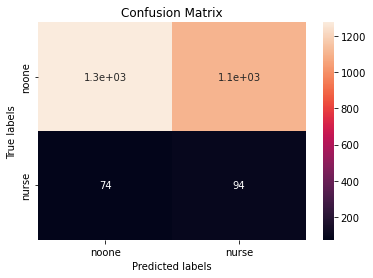

In [24]:
cv_split_testing = kf.split(range(len(all_noone_train)))
foldNum_testing = 0

with tf.device('/CPU:0'):
    for train_index, val_index in cv_split_testing:
        print("Fold {}:".format(foldNum_testing))

        # Select the current folds for training and validation
        noone_train = []
        nurse_train = []
        noone_val = []
        nurse_val = []
        for i in train_index:
            noone_train += all_noone_train[i]
            nurse_train += all_nurse_train[i]
        for i in val_index:
            noone_val += all_noone_train[i]
            nurse_val += all_nurse_train[i]

        # Move images to training and testing folders
        noone_train, nurse_train, noone_val, nurse_val = prepFiles(noone_train, nurse_train, noone_val, nurse_val)
        all_train = [noone_train, nurse_train]
        all_val = [noone_val, nurse_val]

        noone_test_final = glob(VAL_DIR + 'noone/*.png')
        nurse_test_final = glob(VAL_DIR + 'nurse/*.png')


        print("noone_train: {}, nurse_train: {}".format(len(noone_train), len(nurse_train)))
        print("noone_val: {}, nurse_val: {}\n".format(len(noone_val), len(nurse_val)))

        model = create_model()
        model.load_weights("SavedModels/cp_fold_{}_lab.ckpt".format(foldNum_testing))
        
        evalModel(model)
        

        foldNum_testing += 1
    

# Evaluate no-weight model

In [ ]:
model = create_model()
evalModel(model)

# model.load_weights("SavedModels/cp_fold_0.ckpt")

# Evaluate each of the 5-fold models

In [ ]:
for i in range(5):
    model.load_weights("SavedModels/cp_fold_{}.ckpt".format(i))
    evalModel(model)

# Retrain with all training data (no 5-fold)

In [ ]:
with tf.device('/CPU:0'):
    
    noone_train = []
    for i in all_noone_train:
        noone_train += i

    nurse_train = []
    for i in all_nurse_train:
        nurse_train += i

    # Move images to training and testing folders
    noone_train, nurse_train, _, _ = prepFiles(noone_train, nurse_train, [], [])
    all_train = [noone_train, nurse_train]

    print("noone_train: {}, nurse_train: {}".format(len(noone_train), len(nurse_train)))

    weight_for_0 = (1 / (len(noone_train))) * ((len(nurse_train) + len(noone_train)) / 2.0)
    weight_for_1 = (1 / (len(nurse_train))) * ((len(nurse_train) + len(noone_train)) / 2.0)
    CLASS_WEIGHT = {0: weight_for_0, 1: weight_for_1}
    print("Class Weights: {}\n".format(CLASS_WEIGHT))
    
    INITIAL_BIAS = np.log([(len(nurse_train)) / (len(noone_train))])
    print("Initial Bias: {}\n".format(INITIAL_BIAS))

    train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
        color_mode='grayscale',
        class_mode='categorical',
        batch_size=BATCH_SIZE,
        seed=123,
    )
    
    model = create_model()
    model.summary()
    checkpoint_path = "SavedModels/cp_noFold.ckpt"
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='prc', verbose=1, save_best_only=True, save_weights_only=True, mode='auto')
    earlyStopping = EarlyStopping(monitor='prc', min_delta=0, patience=8, verbose=1, mode='auto')

    history = model.fit(
        x=train_generator,
        epochs=20,
        callbacks=[checkpoint, earlyStopping],
        # class_weight=CLASS_WEIGHT,
    )

# Evaluate NoFold Model

In [ ]:
model = create_model()
model.load_weights("SavedModels/cp_noFold.ckpt")
evalModel(model)